### Article Summarizer
Use this application to find the sentences that contain the most used words. The program will need some edits depending on how the HTML document Identifies the body of the article. You could change the Pickle file to be generic if you would like to use it on other documents!

### Import Article

In [5]:
import requests
import pickle
r=requests.get('https://draftsim.com/mtg-30th-anniversary-edition/')
with open('MTGBlog.pkl','wb') as f:
    pickle.dump(r.text,f)

### Check polarity and number of sentences

In [ ]:
import pickle
import spacy
from bs4 import BeautifulSoup
from spacytextblob.spacytextblob import SpacyTextBlob

with open('MTGBlog.pkl', 'rb') as f:
    htmldoc = pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')

text=soup.find("article")    
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())
print("Polarity Score of the Aritcle:  ", doc._.blob.polarity)
i=0
for sentence in list(doc.sents) :
    i+=1
print("Number of Sentences in Article:  ",i)

Polarity Score of the Aritcle:   0.13759259259259254
Number of Sentences in Article:   137


### Find Important Words (BY Lemma) and Show Frequency in Sentences

{'edition', '30th', 'set', 'anniversary', 'card'}


[Text(0.5, 0, 'LemmaScores'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Lemma Score histogram')]

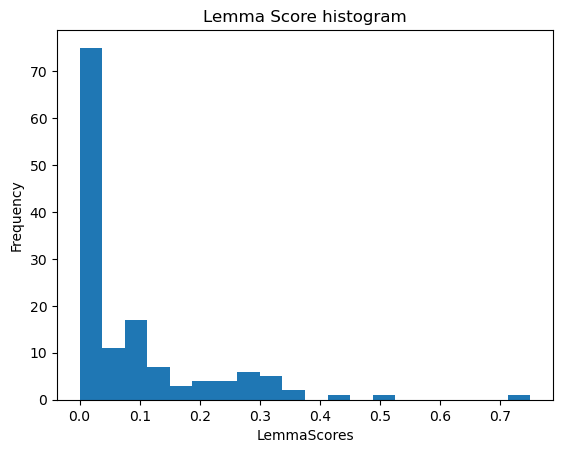

In [14]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())
def important_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
important_tokens = [token for token in doc if important_words(token)]
token_freq=Counter(map(str,important_tokens))
important_tokens = set()
for token, freq in token_freq.most_common(5):
    important_tokens.add(token)

important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

lemma_freq=Counter(important_lemmas)

important_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    important_lemmas.add(lemma)
print(important_lemmas)

def score_sentence_by_token(sentence1, interesting_token):
    count = 0
    count2 = 1
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count +=1
    for token in sentence1:
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2


def score_sentence_by_lemma(sentence1, interesting_lemmas):
    count=0
    count2=1
    for token in sentence1:
        if token.lemma_.lower()in interesting_lemmas:
            count+=1
        if not(token.is_space or token.is_punct):
            count2 += 1
    return count/count2

List_of_lemma_scores=[]
sentence_numbers=[]
for i in doc.sents:
    List_of_lemma_scores.append(score_sentence_by_lemma(i,important_lemmas))
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots()
ax.hist(List_of_lemma_scores,bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='LemmaScores',ylabel='Frequency',title='Lemma Score histogram')

### Summarizer

In [15]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
#open MTGBlog pickle file and create readable doc for spacy
with open ('MTGBlog.pkl','rb') as f:
    htmldoc=pickle.load(f)
soup=BeautifulSoup(htmldoc,'html5lib')
text=soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc=nlp(text.get_text())


def summarizer_lemma(doc):
    #define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_lemmas=[token.lemma_.lower() for token in doc if important_words(token)]

    lemma_freq=Counter(important_lemmas)

    important_lemmas = set()
    for lemma, freq in lemma_freq.most_common(5):
        important_lemmas.add(lemma)
    
    #Score Sentence Function by token
    def score_sentence_by_lemma(sentence1, interesting_lemmas):
        count=0
        count2=1
        for token in sentence1:
            if token.lemma_.lower()in interesting_lemmas:
                count+=1
            if not(token.is_space or token.is_punct):
                count2 += 1
        return count/count2
    #create empty list for sentences
    important_sent=[]
    #break article into sentences
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_token(sent,important_lemmas) >= .28:
            important_sent.append(sent.text.strip())
    print('  '.join(important_sent))

summarizer_lemma(doc)

Are you excited for Magic’s 30th Anniversary Edition?  But is 30th Anniversary Edition really that bad?  30th Anniversary Edition Draftable?How Can You Practice Drafting the Set (for Free)?Wrap Up  30th Anniversary Edition  What’s the Price of 30th Anniversary Edition?  Four packs of 30th Anniversary Edition cost $999.  Is 30th Anniversary Edition Tournament Legal?  Is 30th Anniversary Edition Draftable?  Yes, 30th Anniversary Edition is draftable in theory!  Enable Bootstrap Tooltips
                        $('[data-toggle="tooltip"]').tooltip();

                    });
                
MTG MTG 30th anniversary MTG 30th anniversary edition MTG 30th anniversary edition recommendation MTG 30th anniversary edition review MTG 30th anniversary promos MTG cards MTG collection MTG product review MTG products

  

 Bryan Hohns (Veveil)
